# Exploratory Analysis

## Import Statements

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as st
import statsmodels.api as sm
import math as mt
import random as rd
import time as tm

## Data Loading

In [2]:
file_link = "https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/428/original/bike_sharing.csv?1642089089"

raw_data = pd.read_csv(file_link)
raw_data.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [3]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [4]:
raw_data.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


In [5]:
raw_data.describe(include= 'object')

,datetime
count,10886
unique,10886
top,2011-01-01 00:00:00
freq,1


### Observations:

1. The data contains hourly snapshot of environment variables (season, workingday, temp, humidity) and the corresponding counts of casual, registered and total rented electric bikes
2. Datetime is considered as object: need to be changed to timestamp
3. season and weather are category columns which are considered as integer: need to convert into category
4. Holiday and workingday are yes/no boolean columns but with integer type: need to convert into category or boolean
5. There are no null values in the data set

### Next Steps:

1. Convert datetime to timestamp
2. Convert season and weather to category with sensible names
3. Convert holiday and workingday to Category columns

## Data Cleaning

1. Chane data types
2. Check for null values
3. Check for outliers

In [6]:
clean_data = raw_data.copy()

clean_data['datetime'] = pd.to_datetime(clean_data['datetime'])

In [7]:
column_mapping = {
    'season'    : {
        1: '1. spring',
        2: '2. summer',
        3: '3. fall',
        4: '4: winter'
    },
    'weather'   : {
        1: '1. Clear or Few Clouds',
        2: '2. Mist and Broken Cluds',
        3: '3. Light Snow/Rain and Thunders',
        4: '4. Heavy Rain/Snow and Thunderstorm'
    },
    'workingday': {
        1: 'Yes',
        0: 'No'
    },
    'holiday'   : {
        1: 'Yes',
        0: 'No'
    }
}


for column in column_mapping:
    clean_data[column] = clean_data[column].map(column_mapping[column]).astype('category')


In [8]:
clean_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  category      
 2   holiday     10886 non-null  category      
 3   workingday  10886 non-null  category      
 4   weather     10886 non-null  category      
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
dtypes: category(4), datetime64[ns](1), float64(3), int64(4)
memory usage: 723.7 KB


In [9]:
clean_data.isna().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

In [10]:
value_counts = pd.DataFrame()

columns_to_check_freq = [
    'season', 'weather', 'holiday', 'workingday'
    ]

for column in columns_to_check_freq:
    column_value_counts = (
        clean_data[column]
        .value_counts()
        .reset_index()
        .rename(columns={column:'value'})
        )
    column_value_counts['pct'] = column_value_counts['count'] * 100 / clean_data.shape[0]
    column_value_counts['column'] = column
    value_counts = pd.concat([value_counts, column_value_counts], ignore_index=True)

value_counts[['column', 'value', 'count', 'pct']]

,column,value,count,pct
0,season,4: winter,2734,25.114826
1,season,2. summer,2733,25.105640
2,season,3. fall,2733,25.105640
3,season,1. spring,2686,24.673893
4,weather,1. Clear or Few Clouds,7192,66.066507
5,weather,2. Mist and Broken Cluds,2834,26.033437
6,weather,3. Light Snow/Rain and Thunders,859,7.890869
7,weather,4. Heavy Rain/Snow and Thunderstorm,1,0.009186
8,holiday,No,10575,97.143120
9,holiday,Yes,311,2.856880


In [11]:
clean_data.describe()

,datetime,temp,atemp,humidity,windspeed,casual,registered,count
count,10886,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2011-12-27 05:56:22.399411968,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
min,2011-01-01 00:00:00,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2011-07-02 07:15:00,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,2012-01-01 20:30:00,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,2012-07-01 12:45:00,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,2012-12-19 23:00:00,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000
std,NaN,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454


In [12]:
clean_data.describe(include='category')

,season,holiday,workingday,weather
count,10886,10886,10886,10886
unique,4,2,2,4
top,4: winter,No,Yes,1. Clear or Few Clouds
freq,2734,10575,7412,7192


In [13]:
columns_to_check_outliers = [
    'temp', 'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count'
    ]

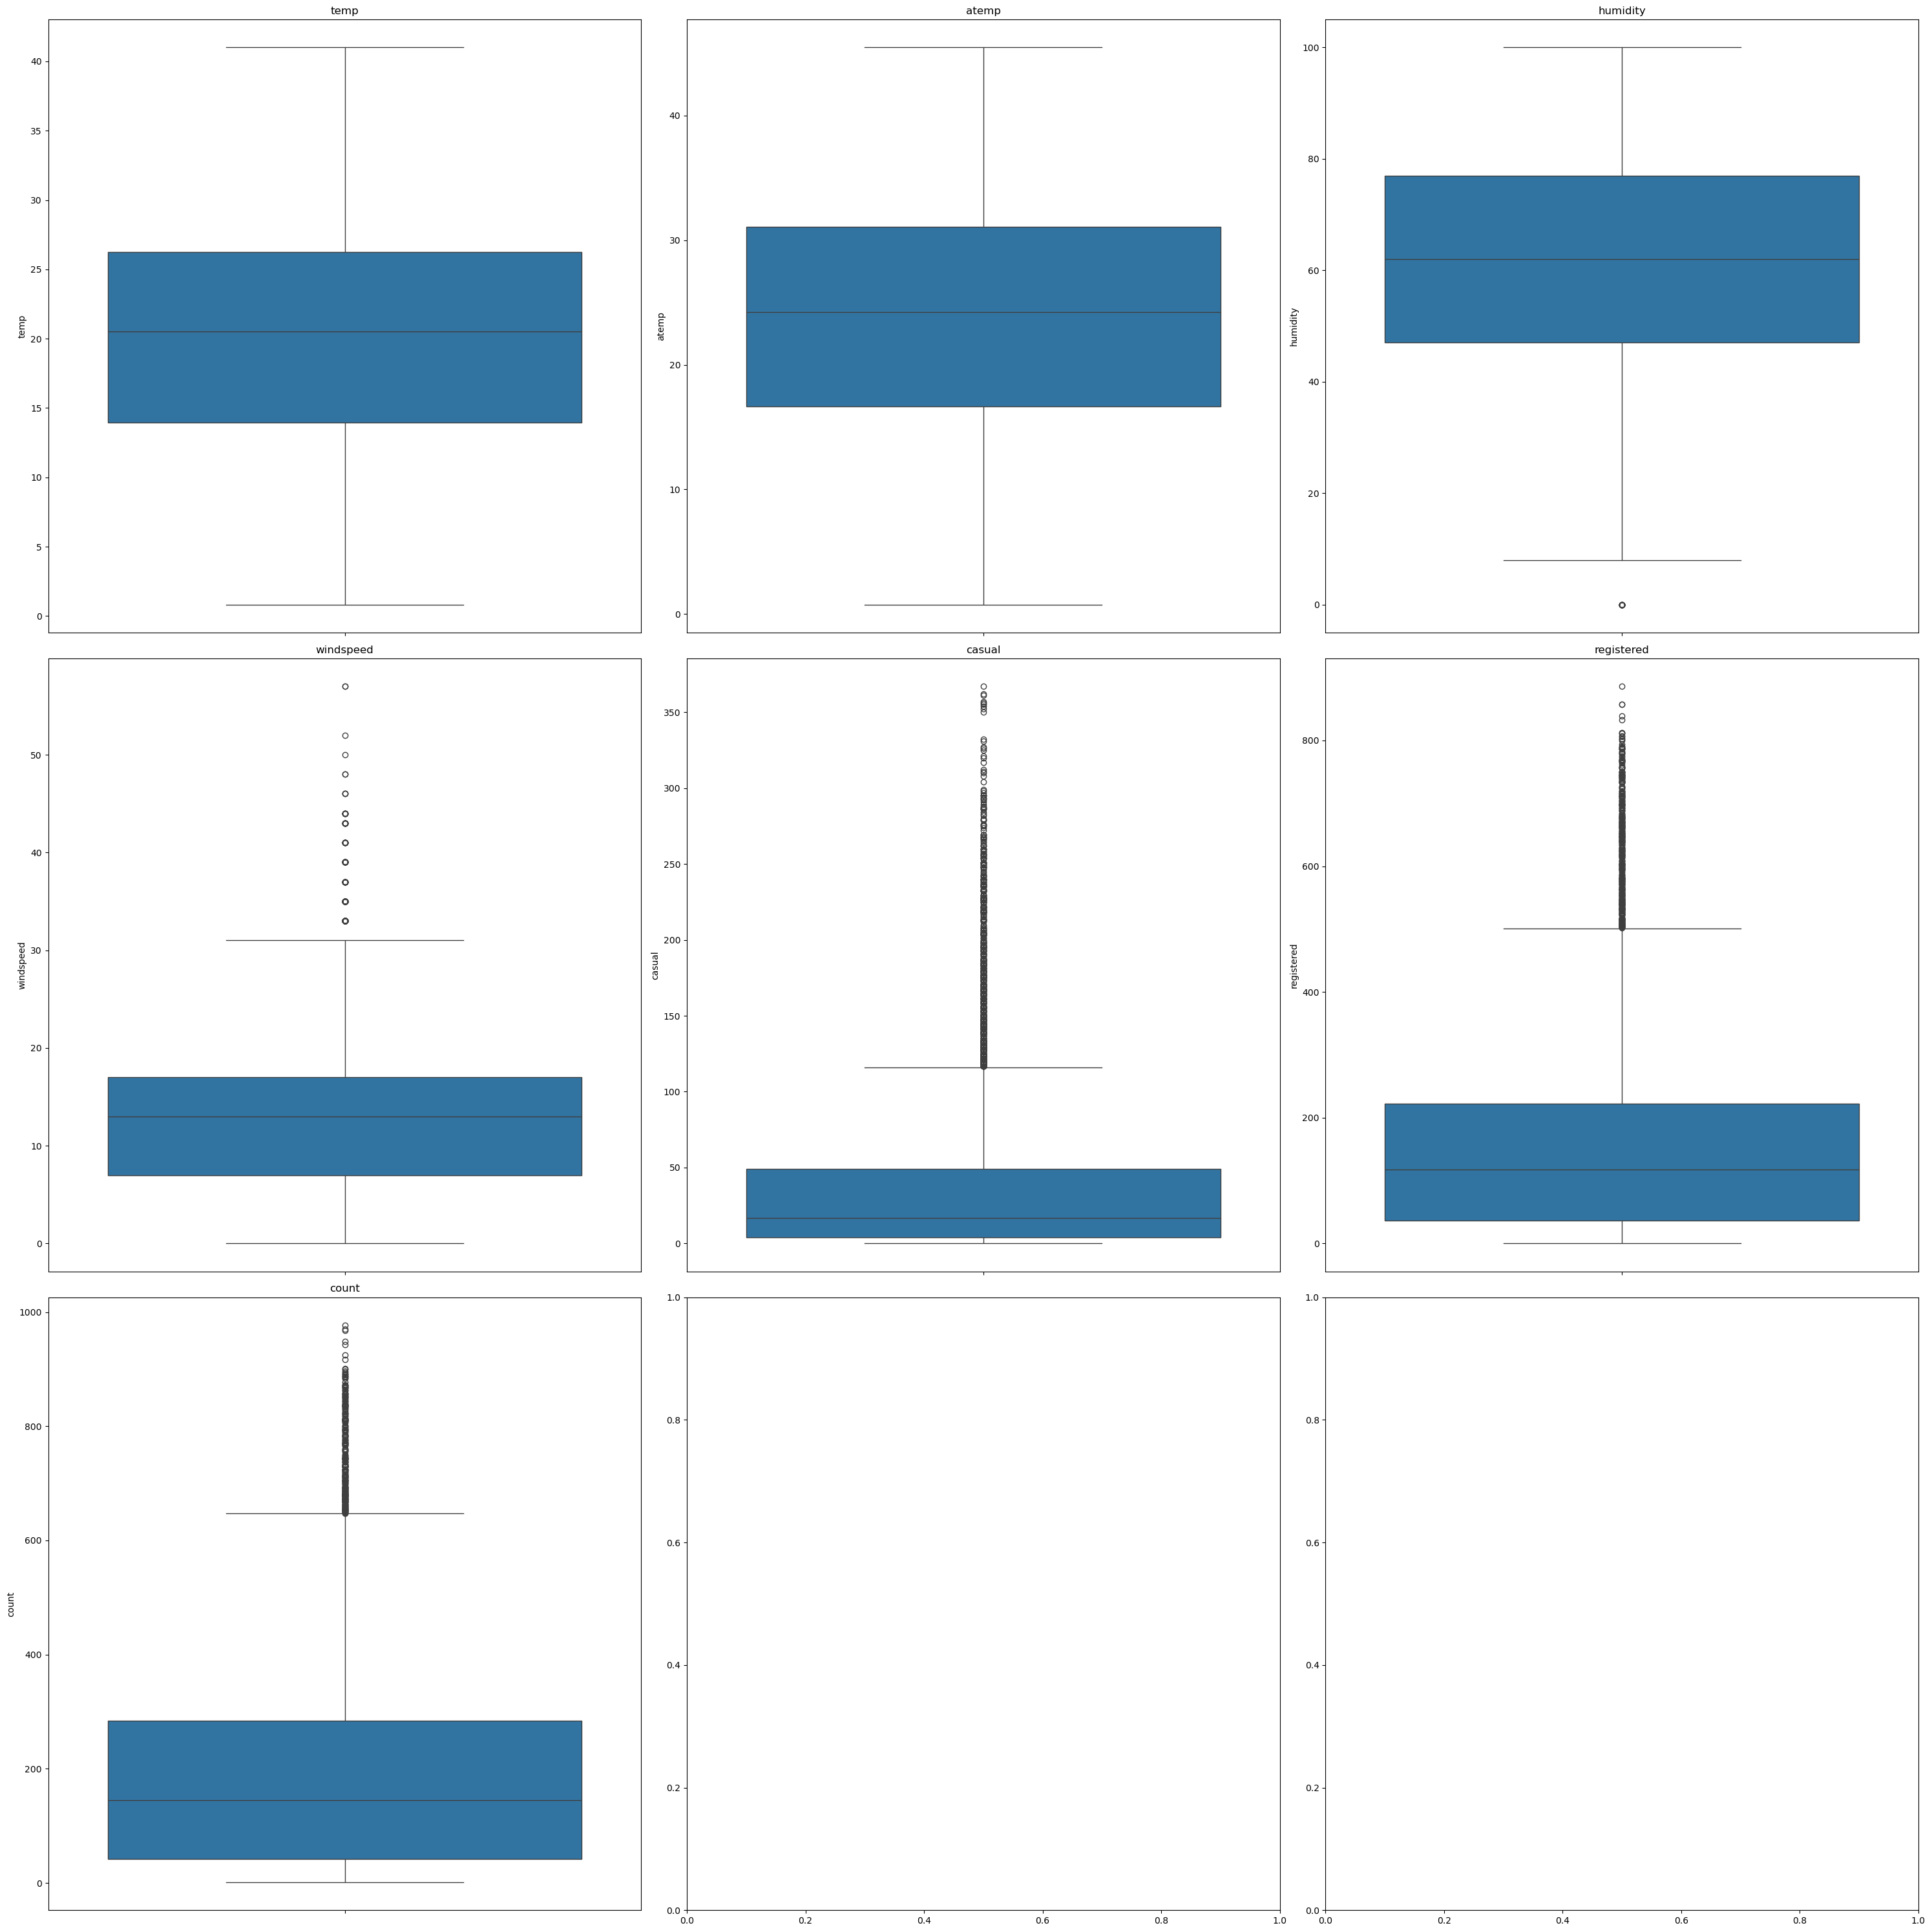

In [14]:
n = len(columns_to_check_outliers)
r, c = mt.ceil(mt.sqrt(n)), mt.ceil(mt.sqrt(n))

fig, axes = plt.subplots(r, c, figsize=(r*10, c*10))

axes = axes.flatten()
for i, column in enumerate(columns_to_check_outliers):
    sns.boxplot(data=clean_data, y=column, ax=axes[i])
    axes[i].set_title(f'{column}')

plt.tight_layout()
plt.show()

In [15]:
outlier_summary = pd.DataFrame()

for column in columns_to_check_outliers:

    iqr = clean_data[column].quantile(0.75) - clean_data[column].quantile(0.25)
    lower_bound = clean_data[column].quantile(0.25) - 1.5 * iqr
    upper_bound = clean_data[column].quantile(0.75) + 1.5 * iqr

    total_count = clean_data.shape[0]
    lower_count = clean_data[clean_data[column] < lower_bound].shape[0]
    upper_count = clean_data[clean_data[column] > upper_bound].shape[0]

    outlier_distribution = pd.DataFrame({
        'Bound': ['lower', 'upper'],
        'Limit': [lower_bound, upper_bound],
        'Count': [lower_count, upper_count],
        'Percentage': [lower_count*100/total_count, upper_count*100/total_count]
        }
    )

    outlier_distribution['Column'] = column

    outlier_summary = pd.concat(
        [outlier_summary, outlier_distribution], ignore_index= True
    )

outlier_summary[['Column', 'Bound', 'Limit', 'Count', 'Percentage']]

,Column,Bound,Limit,Count,Percentage
0,temp,lower,-4.5100,0,0.000000
1,temp,upper,44.6900,0,0.000000
2,atemp,lower,-4.9275,0,0.000000
3,atemp,upper,52.6525,0,0.000000
4,humidity,lower,2.0000,22,0.202094
5,humidity,upper,122.0000,0,0.000000
6,windspeed,lower,-7.9931,0,0.000000
7,windspeed,upper,31.9925,227,2.085247
8,casual,lower,-63.5000,0,0.000000
9,casual,upper,116.5000,749,6.880397


In [16]:
clean_data.loc[
    clean_data['humidity'] < (
        outlier_summary.loc[
            (outlier_summary['Column'] == 'humidity') & (outlier_summary['Bound'] == 'lower'),
            'Limit'
            ].values[0]
        ),
    ['humidity']
    ]

,humidity
1091,0
1092,0
1093,0
1094,0
1095,0
1096,0
1097,0
1098,0
1099,0
1100,0


In [17]:
clean_data.loc[
    clean_data['windspeed'] > (
        outlier_summary.loc[
            (outlier_summary['Column'] == 'windspeed') & (outlier_summary['Bound'] == 'upper'),
            'Limit'
            ].values[0]
        ),
    ['windspeed']
    ]

,windspeed
175,32.9975
178,36.9974
194,35.0008
196,35.0008
265,39.0007
...,...
10013,32.9975
10154,32.9975
10263,43.0006
10540,32.9975


<Axes: xlabel='windspeed', ylabel='Count'>

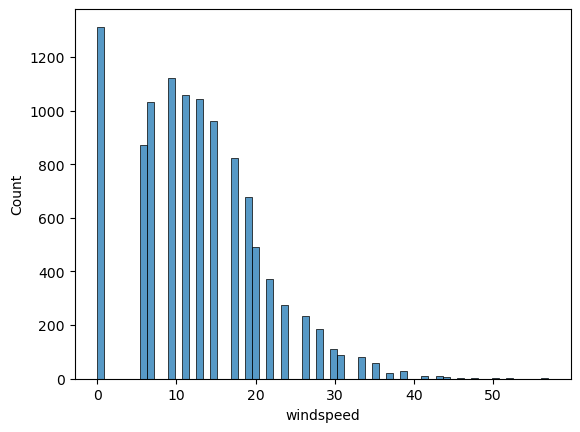

In [18]:
sns.histplot(data= clean_data, x= 'windspeed')

### Observations:

1. There is information from Jan 2011 to  Dec 2012 in the data
2. Independent columns humidity and windspeed have lower and upper outliers respectively
3. There are 22 (0.2%) records with 0 humidity that are outliers, since 0 humidity is not possible on earth hence these records can be removed
4. Ther are 227 (2%) records with windspeed > 32, this needs business judgement, for now I am keeping these outliers since such high wind speeds as possible and may lead to low renting of bikes
5. The count of rented cycles have outliers but since these are dependent variables and such high demand need also to be predicted, I am keeping these as well
6. More independent variables can be extracted from datetime, such as day of month, hour of day, day of week, month

### Next Steps:

1. Remove outliers from humidity column
2. Add more dependant varibles based on datetime column
3. Remove the datetime column and add a row id for each row
4. For the current analysis, casual and registered count are not required

In [34]:
clean_data['weekday'] = clean_data['datetime'].dt.day_name().astype('category')

bins = [2, 7, 12, 17, 21, 26]
labels = ['1. Early Morning', '2. Morning', '3. Afternoon', '4. Evening', '5. Mid Night']
clean_data['hour'] = (
    pd.cut(
        clean_data['datetime'].dt.hour.apply(lambda x: x + 24 if x < 3 else x),
        bins= bins,
        labels= labels
    )
    .astype('category')
)

In [40]:
analysis_data = (
    clean_data[clean_data['humidity'] > 0]
    .drop(columns= ['casual', 'registered', 'datetime'])
    .reset_index()
    .rename(columns= {'index': 'rowid'})
    )

analysis_data['rowid'] = analysis_data['rowid'].astype('str')

analysis_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10864 entries, 0 to 10863
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   rowid       10864 non-null  object  
 1   season      10864 non-null  category
 2   holiday     10864 non-null  category
 3   workingday  10864 non-null  category
 4   weather     10864 non-null  category
 5   temp        10864 non-null  float64 
 6   atemp       10864 non-null  float64 
 7   humidity    10864 non-null  int64   
 8   windspeed   10864 non-null  float64 
 9   count       10864 non-null  int64   
 10  weekday     10864 non-null  category
 11  hour        10864 non-null  category
dtypes: category(6), float64(3), int64(2), object(1)
memory usage: 574.2+ KB


## Univariate Analysis

**Types of columns:**

| Categorical   | Numerical | Target    | IDs   |
| :------------ | :-------- | :-------- | :---- |
| season        | temp      | count     | rowid |
| holiday       | atemp     |           |       |
| workingday    | humidity  |           |       |
| weather       | windspeed |           |       |
| weekday       |           |           |       |
| hour          |           |           |       |